## Mnist 손글씨 데이터 준비

In [1]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# mnist 데이터는 손글씨 숫자 데이터
# 딥러닝은 0~1 사이로 input 데이터의 범위를 해줘야 학습이 잘 됌 (일종의 normalization)
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


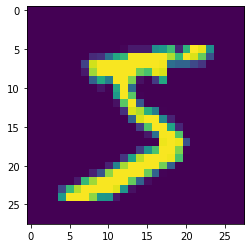

In [7]:
import matplotlib.pyplot as plt

image = x_train[0,:].reshape(28,28)
plt.imshow(image)
plt.show()

## Conv2D layer만 사용

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
model = Sequential()
model.add(Reshape((28, 28, 1)))
model.add(Conv2D(16, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1591 - accuracy: 0.9519
Epoch 2/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0652 - accuracy: 0.9803
Epoch 3/5
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0449 - accuracy: 0.9858
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0309 - accuracy: 0.9902
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0240 - accuracy: 0.9918
313/313 - 2s - loss: 0.0717 - accuracy: 0.9812 - 2s/epoch - 5ms/step


[0.0717233270406723, 0.9811999797821045]

## (Conv2D + Maxpooling) layer

Pooling layer는 이미지의 크기를 작게 만듦으로써 정보의 손실을 가져온다고 볼수도 있다. 하지만 Flatten layer가 있는 모델의 구조상 pooling layer를 통해서 전체 모델의 parameter 양은 되려 줄어든다.

In [ ]:
model = Sequential()
model.add(Reshape((28, 28, 1)))
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
60000/60000 [==============================] - 11s 186us/step - loss: 0.1690 - accuracy: 0.9495
Epoch 2/5
60000/60000 [==============================] - 10s 167us/step - loss: 0.0686 - accuracy: 0.9787
Epoch 3/5
60000/60000 [==============================] - 11s 181us/step - loss: 0.0542 - accuracy: 0.9838
Epoch 4/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.0443 - accuracy: 0.9864
Epoch 5/5
60000/60000 [==============================] - 10s 161us/step - loss: 0.0365 - accuracy: 0.9881


[0.06498098999832291, 0.9801999926567078]

## 더 깊은 layer 층

In [ ]:
model = Sequential()
model.add(Reshape((28, 28, 1)))
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
60000/60000 [==============================] - 15s 252us/step - loss: 0.1384 - accuracy: 0.9582
Epoch 2/5
60000/60000 [==============================] - 14s 228us/step - loss: 0.0523 - accuracy: 0.9835
Epoch 3/5
60000/60000 [==============================] - 14s 225us/step - loss: 0.0399 - accuracy: 0.9877
Epoch 4/5
60000/60000 [==============================] - 14s 226us/step - loss: 0.0317 - accuracy: 0.9898
Epoch 5/5
60000/60000 [==============================] - 13s 222us/step - loss: 0.0263 - accuracy: 0.9915


[0.04398057919087005, 0.9857000112533569]

## Padding 반영

In [ ]:
model = Sequential()
model.add(Reshape((28, 28, 1)))
model.add(Conv2D(16, 3, activation='relu',padding="same"))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 3, activation='relu',padding="same"))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
60000/60000 [==============================] - 19s 323us/step - loss: 0.1418 - accuracy: 0.9576
Epoch 2/5
60000/60000 [==============================] - 19s 310us/step - loss: 0.0524 - accuracy: 0.9840
Epoch 3/5
60000/60000 [==============================] - 19s 311us/step - loss: 0.0394 - accuracy: 0.9876
Epoch 4/5
60000/60000 [==============================] - 19s 309us/step - loss: 0.0320 - accuracy: 0.9900
Epoch 5/5
60000/60000 [==============================] - 19s 313us/step - loss: 0.0259 - accuracy: 0.9917


[0.03481202310656518, 0.9887999892234802]

# Prediction

In [12]:
predictions = model.predict(x_test)

[5.8155668e-11 1.0134315e-11 1.1942161e-08 2.1935781e-11 7.3278539e-10
 2.6579269e-08 1.0000000e+00 1.1264166e-15 2.1052051e-12 3.8169778e-14]
예측 : 숫자 6
정답 : 숫자 6


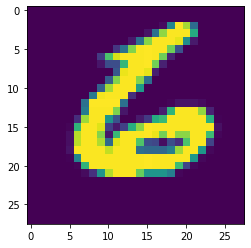

In [16]:
count = 9999
print(predictions[count])
print('예측 : 숫자', np.argmax(predictions[count]))
image = x_test[count,:].reshape(28,28)
print('정답 : 숫자', f'{int(y_test[count])}')
plt.imshow(image)
plt.show()